1.a.Load the dataset and display first 5 rows

In [5]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('dataset.csv')

# Display first 5 rows
print("First 5 rows of the dataset:")
print(df.head())


First 5 rows of the dataset:
   OrderId  UserId  OrderValue           PaymentType District  OrderSource  \
0  2562691  663791         168  MPD                     Dhaka      android   
1  2561859  961083         240  MPD                     Dhaka  mobile-site   
2  2561434  848517         120  MPD                     Dhaka      desktop   
3  2561202  276304         185  MPD                     Dhaka      android   
4  2561033  955384         201  MPD                     Dhaka      android   

  OrderType  DeliveryCharge   OrderPlacedDay OrderConfirmDayOverPhone  \
0    normal            25.0   6/26/2019 9:20           6/26/2019 3:30   
1    normal            35.0  6/25/2019 19:05          6/25/2019 13:40   
2    normal            35.0  6/25/2019 15:28           6/25/2019 9:27   
3    normal            25.0  6/25/2019 13:27           6/25/2019 7:27   
4    normal            25.0  6/25/2019 12:13           6/25/2019 6:56   

  IsCartOrder OrderFromPromotionalEvent   courierService  isRTO

2.b.Display summary statistics

In [6]:
# Display basic summary statistics
print("\nSummary statistics of numerical columns:")
print(df.describe())

# Display information about the dataset
print("\nDataset information:")
print(df.info())

# Display count of non-null values and data types
print("\nColumn-wise information:")
print(df.info(verbose=True, show_counts=True))



Summary statistics of numerical columns:
            OrderId         UserId   OrderValue  DeliveryCharge  \
count  1.000000e+04   10000.000000  10000.00000     9999.000000   
mean   2.539235e+06  760484.345100    336.97160       33.782678   
std    9.560667e+03  244170.093658    435.38002       24.795291   
min    2.522672e+06      83.000000      0.00000        0.000000   
25%    2.531893e+06  616375.750000    160.00000       25.000000   
50%    2.538966e+06  883312.000000    230.00000       25.000000   
75%    2.546397e+06  950553.000000    386.25000       55.000000   
max    2.562691e+06  961083.000000  12800.00000      500.000000   

        courierService   
count               0.0  
mean                NaN  
std                 NaN  
min                 NaN  
25%                 NaN  
50%                 NaN  
75%                 NaN  
max                 NaN  

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 

1.c.Check for missing values and visualize target distribution


Missing values in each column:
OrderId                          0
UserId                           0
OrderValue                       0
PaymentType                      0
District                         0
OrderSource                      0
OrderType                      417
DeliveryCharge                   1
OrderPlacedDay                   0
OrderConfirmDayOverPhone         0
IsCartOrder                      0
OrderFromPromotionalEvent        0
 courierService              10000
isRTO                            0
dtype: int64

Percentage of missing values in each column:
OrderId                        0.00
UserId                         0.00
OrderValue                     0.00
PaymentType                    0.00
District                       0.00
OrderSource                    0.00
OrderType                      4.17
DeliveryCharge                 0.01
OrderPlacedDay                 0.00
OrderConfirmDayOverPhone       0.00
IsCartOrder                    0.00
OrderFromPromotionalEve

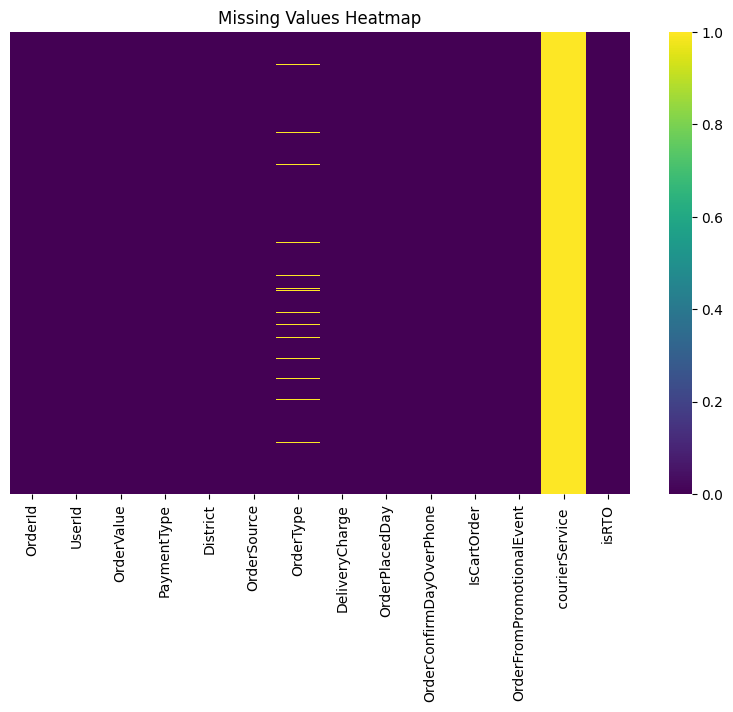

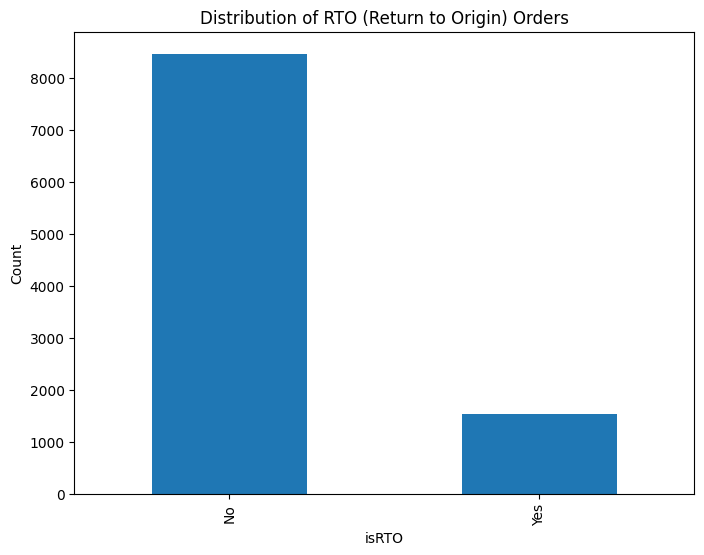


Percentage distribution of RTO orders:
isRTO
No     84.65
Yes    15.35
Name: proportion, dtype: float64


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Calculate percentage of missing values
print("\nPercentage of missing values in each column:")
print((df.isnull().sum() / len(df)) * 100)

# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=True, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

# Visualize target distribution (isRTO)
plt.figure(figsize=(8, 6))
df['isRTO'].value_counts().plot(kind='bar')
plt.title('Distribution of RTO (Return to Origin) Orders')
plt.xlabel('isRTO')
plt.ylabel('Count')
plt.show()

# Show percentage distribution
print("\nPercentage distribution of RTO orders:")
print(df['isRTO'].value_counts(normalize=True) * 100)


1.d. Plot 2 numerical and 2 categorical features

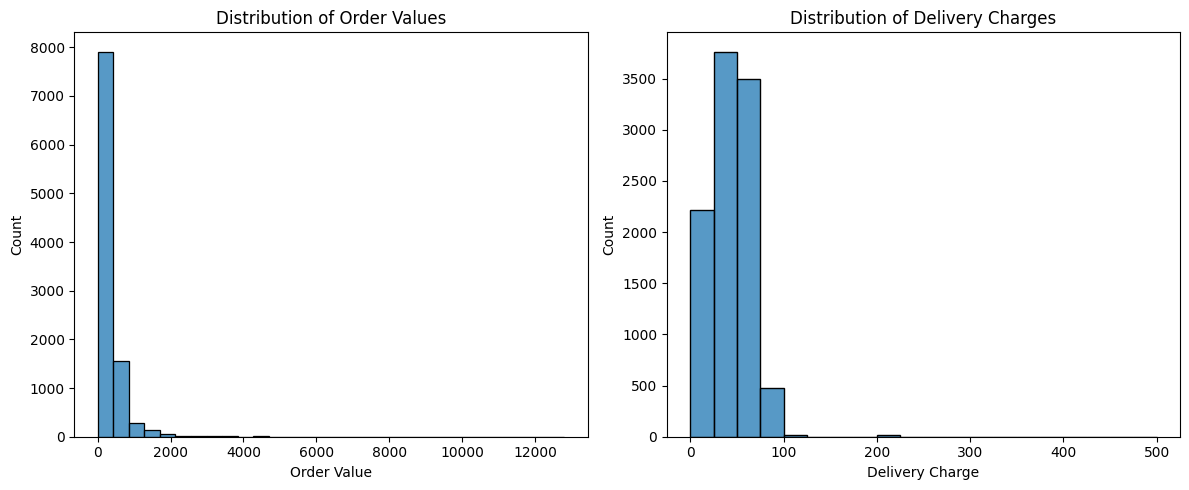

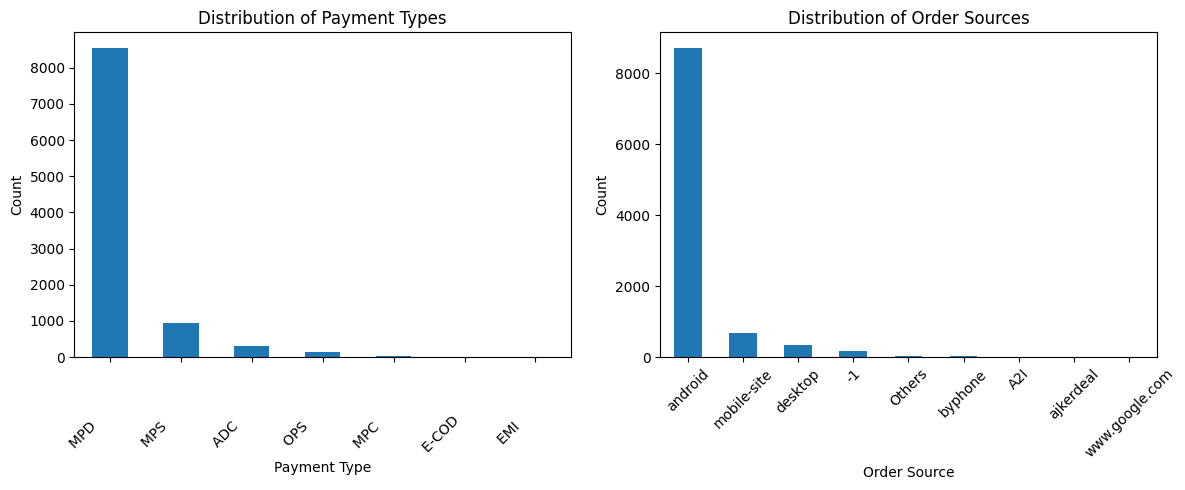

In [8]:
# Numerical Features
plt.figure(figsize=(12, 5))

# OrderValue distribution
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='OrderValue', bins=30)
plt.title('Distribution of Order Values')
plt.xlabel('Order Value')
plt.ylabel('Count')

# DeliveryCharge distribution 
plt.subplot(1, 2, 2)
sns.histplot(data=df, x='DeliveryCharge', bins=20)
plt.title('Distribution of Delivery Charges')
plt.xlabel('Delivery Charge')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Categorical Features
plt.figure(figsize=(12, 5))

# PaymentType distribution
plt.subplot(1, 2, 1)
df['PaymentType'].value_counts().plot(kind='bar')
plt.title('Distribution of Payment Types')
plt.xlabel('Payment Type')
plt.ylabel('Count')
plt.xticks(rotation=45)

# OrderSource distribution
plt.subplot(1, 2, 2)
df['OrderSource'].value_counts().plot(kind='bar')
plt.title('Distribution of Order Sources')
plt.xlabel('Order Source')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


1.e. Correlation heatmap

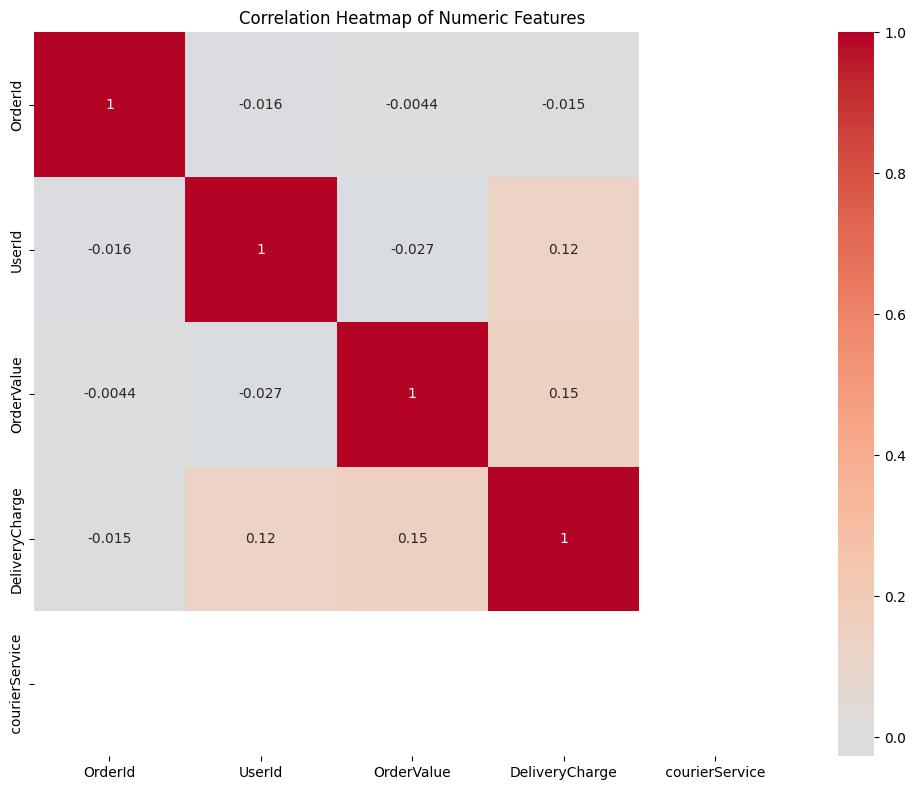

In [9]:
# Select numeric columns for correlation
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Create correlation matrix
corr_matrix = df[numeric_cols].corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Numeric Features')
plt.tight_layout()
plt.show()


Task 2: Data Preprocessing

2.a. Handle missing values 

In [12]:
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

df['OrderType'] = df['OrderType'].fillna('normal')

# Fill missing DeliveryCharge with median for each District
df['DeliveryCharge'] = df.groupby('District')['DeliveryCharge'].transform(lambda x: x.fillna(x.median()))

# Fill any remaining missing DeliveryCharge with overall median
df['DeliveryCharge'] = df['DeliveryCharge'].fillna(df['DeliveryCharge'].median())

# Fix the courierService column name and handle missing values
# First rename the column to remove extra spaces
df = df.rename(columns={' courierService ': 'courierService'})

# Now fill missing values
df['courierService'] = df['courierService'].fillna('Unknown')

# Verify no missing values remain
print("\nMissing values after handling:")
print(df.isnull().sum())


Missing values in each column:
OrderId                          0
UserId                           0
OrderValue                       0
PaymentType                      0
District                         0
OrderSource                      0
OrderType                        0
DeliveryCharge                   0
OrderPlacedDay                   0
OrderConfirmDayOverPhone         0
IsCartOrder                      0
OrderFromPromotionalEvent        0
 courierService              10000
isRTO                            0
dtype: int64

Missing values after handling:
OrderId                      0
UserId                       0
OrderValue                   0
PaymentType                  0
District                     0
OrderSource                  0
OrderType                    0
DeliveryCharge               0
OrderPlacedDay               0
OrderConfirmDayOverPhone     0
IsCartOrder                  0
OrderFromPromotionalEvent    0
courierService               0
isRTO                        0


2.b Encode categorical variables

In [17]:
# Import required libraries
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_columns = ['PaymentType', 'District', 'OrderSource', 'OrderType', 'IsCartOrder', 
                      'OrderFromPromotionalEvent', 'courierService', 'isRTO']

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Create a copy of the dataframe for encoded values
df_encoded = df.copy()

# Apply label encoding to categorical columns
for column in categorical_columns:
    df_encoded[column] = label_encoder.fit_transform(df[column].astype(str))

# Convert OrderPlacedDay and OrderConfirmDayOverPhone to datetime
df_encoded['OrderPlacedDay'] = pd.to_datetime(df_encoded['OrderPlacedDay'])
df_encoded['OrderConfirmDayOverPhone'] = pd.to_datetime(df_encoded['OrderConfirmDayOverPhone'])

# Extract useful features from datetime columns
df_encoded['OrderPlacedHour'] = df_encoded['OrderPlacedDay'].dt.hour
df_encoded['OrderPlacedDayOfWeek'] = df_encoded['OrderPlacedDay'].dt.dayofweek
df_encoded['OrderConfirmHour'] = df_encoded['OrderConfirmDayOverPhone'].dt.hour

# Calculate processing time in hours
df_encoded['ProcessingTimeHours'] = (df_encoded['OrderConfirmDayOverPhone'] - df_encoded['OrderPlacedDay']).dt.total_seconds() / 3600

# Drop the original datetime columns as they've been transformed
df_encoded = df_encoded.drop(['OrderPlacedDay', 'OrderConfirmDayOverPhone'], axis=1)

print("Shape of encoded dataset:", df_encoded.shape)
print("\nEncoded columns:", df_encoded.columns.tolist())


Shape of encoded dataset: (10000, 16)

Encoded columns: ['OrderId', 'UserId', 'OrderValue', 'PaymentType', 'District', 'OrderSource', 'OrderType', 'DeliveryCharge', 'IsCartOrder', 'OrderFromPromotionalEvent', 'courierService', 'isRTO', 'OrderPlacedHour', 'OrderPlacedDayOfWeek', 'OrderConfirmHour', 'ProcessingTimeHours']


2.c: Normalize or standardize if needed

In [18]:
# Import required library
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Identify numerical columns (excluding target variable 'isRTO')
numerical_columns = ['OrderValue', 'DeliveryCharge', 'OrderPlacedHour', 
                    'OrderPlacedDayOfWeek', 'OrderConfirmHour', 'ProcessingTimeHours']

# Create a copy of the dataframe for scaled values
df_scaled = df_encoded.copy()

# Apply standard scaling to numerical columns
df_scaled[numerical_columns] = scaler.fit_transform(df_encoded[numerical_columns])

print("Shape of scaled dataset:", df_scaled.shape)
print("\nNumerical columns that were scaled:", numerical_columns)
print("\nSample of scaled values:")
print(df_scaled[numerical_columns].head())


Shape of scaled dataset: (10000, 16)

Numerical columns that were scaled: ['OrderValue', 'DeliveryCharge', 'OrderPlacedHour', 'OrderPlacedDayOfWeek', 'OrderConfirmHour', 'ProcessingTimeHours']

Sample of scaled values:
   OrderValue  DeliveryCharge  OrderPlacedHour  OrderPlacedDayOfWeek  \
0   -0.388121       -0.354316              0.0                   0.0   
1   -0.222740        0.049012              0.0                   0.0   
2   -0.498375        0.049012              0.0                   0.0   
3   -0.349073       -0.354316              0.0                   0.0   
4   -0.312321       -0.354316              0.0                   0.0   

   OrderConfirmHour  ProcessingTimeHours  
0               0.0            -0.334811  
1               0.0            -0.358101  
2               0.0            -0.311520  
3               0.0            -0.313311  
4               0.0            -0.313311  


2.d Split the dataset into training and testing sets

In [19]:
# Import required library
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = df_scaled.drop('isRTO', axis=1)
y = df_scaled['isRTO']

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)
print("\nClass distribution in training set:")
print(y_train.value_counts(normalize=True))
print("\nClass distribution in testing set:") 
print(y_test.value_counts(normalize=True))


Training set shape: (8000, 15)
Testing set shape: (2000, 15)

Class distribution in training set:
isRTO
0    0.8455
1    0.1545
Name: proportion, dtype: float64

Class distribution in testing set:
isRTO
0    0.8505
1    0.1495
Name: proportion, dtype: float64


Task 3: Feature Engineering


3.a: Create at least 2 new featur

In [21]:
# Extract hour from OrderPlacedDay and OrderConfirmDayOverPhone
df_scaled['OrderPlacedHour'] = pd.to_datetime(df['OrderPlacedDay']).dt.hour
df_scaled['OrderConfirmHour'] = pd.to_datetime(df['OrderConfirmDayOverPhone']).dt.hour

# Calculate time difference between order placed and confirmation (in hours)
df_scaled['ConfirmationDelay'] = (pd.to_datetime(df['OrderConfirmDayOverPhone']) - 
                                 pd.to_datetime(df['OrderPlacedDay'])).dt.total_seconds() / 3600

# Calculate order value per delivery charge ratio
df_scaled['ValuePerDeliveryCharge'] = df['OrderValue'] / df['DeliveryCharge'].replace(0, 1)

print("\nNewly created features:")
print("1. OrderPlacedHour: Hour when order was placed")
print("2. OrderConfirmHour: Hour when order was confirmed")
print("3. ConfirmationDelay: Time difference between order placement and confirmation (hours)")
print("4. ValuePerDeliveryCharge: Ratio of order value to delivery charge")

print("\nSample of new features:")
print(df_scaled[['OrderPlacedHour', 'OrderConfirmHour', 'ConfirmationDelay', 'ValuePerDeliveryCharge']].head())



Newly created features:
1. OrderPlacedHour: Hour when order was placed
2. OrderConfirmHour: Hour when order was confirmed
3. ConfirmationDelay: Time difference between order placement and confirmation (hours)
4. ValuePerDeliveryCharge: Ratio of order value to delivery charge

Sample of new features:
   OrderPlacedHour  OrderConfirmHour  ConfirmationDelay  \
0                0                 0      -1.552778e-10   
1                0                 0      -1.588889e-10   
2                0                 0      -1.516667e-10   
3                0                 0      -1.519444e-10   
4                0                 0      -1.519444e-10   

   ValuePerDeliveryCharge  
0                6.720000  
1                6.857143  
2                3.428571  
3                7.400000  
4                8.040000  


3.b: Remove redundant or highly correlated features

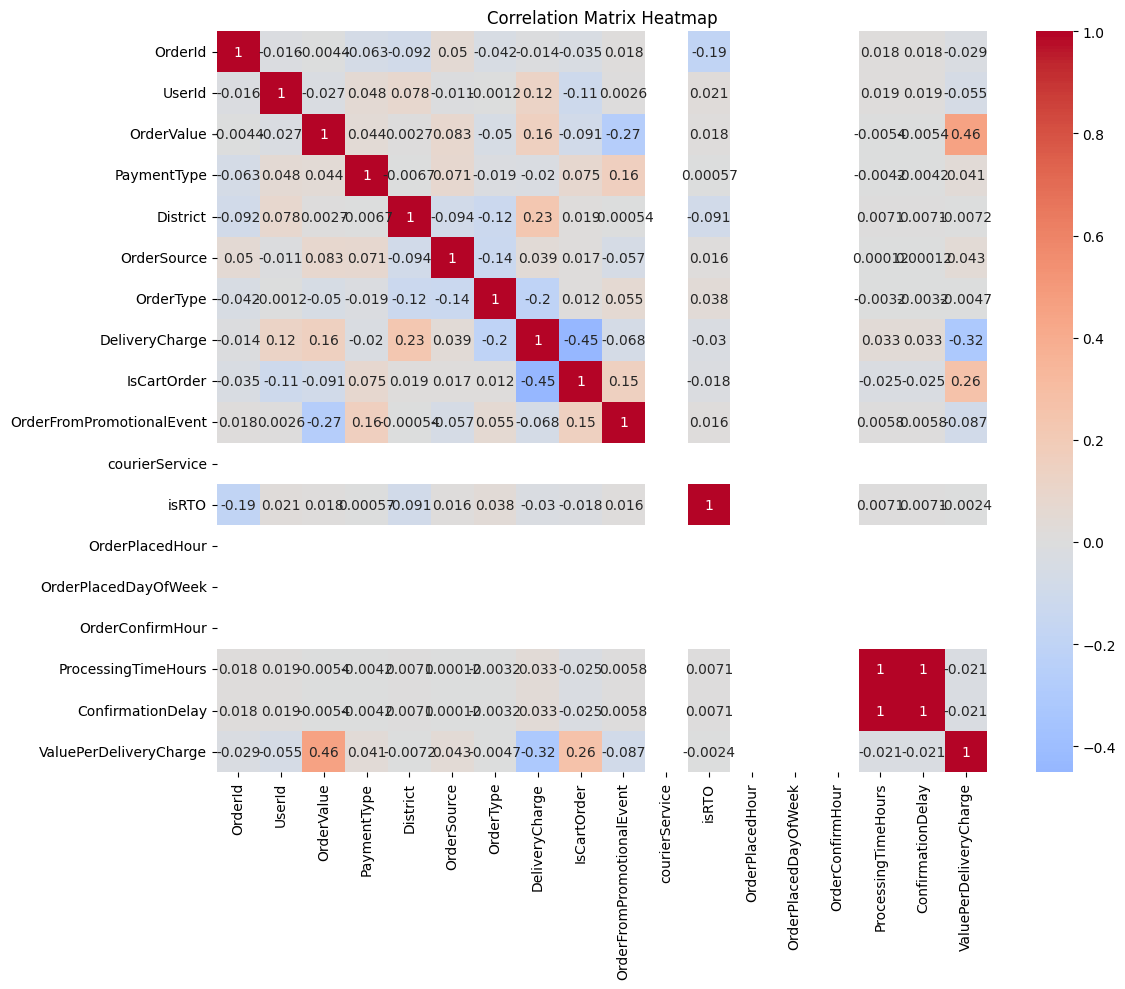


Highly correlated feature pairs (correlation > 0.8):
ProcessingTimeHours - ConfirmationDelay: 1.000

Features removed: ['OrderConfirmHour']

Remaining features: ['OrderId', 'UserId', 'OrderValue', 'PaymentType', 'District', 'OrderSource', 'OrderType', 'DeliveryCharge', 'IsCartOrder', 'OrderFromPromotionalEvent', 'courierService', 'isRTO', 'OrderPlacedHour', 'OrderPlacedDayOfWeek', 'ProcessingTimeHours', 'ConfirmationDelay', 'ValuePerDeliveryCharge']

Final dataset shape: (10000, 17)


In [23]:
# Calculate correlation matrix
correlation_matrix = df_scaled.corr()

# Create a heatmap of correlations
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

# Find highly correlated feature pairs (correlation > 0.8)
high_corr_features = np.where(np.abs(correlation_matrix) > 0.8)
high_corr_features = [(correlation_matrix.index[x], correlation_matrix.columns[y], correlation_matrix.iloc[x, y]) 
                      for x, y in zip(*high_corr_features) if x != y and x < y]

print("\nHighly correlated feature pairs (correlation > 0.8):")
for feat1, feat2, corr in high_corr_features:
    print(f"{feat1} - {feat2}: {corr:.3f}")

# Features to remove based on correlation and domain knowledge
features_to_remove = [
    'OrderConfirmHour'           # Redundant with ConfirmationDelay
]

# Remove selected features
df_scaled = df_scaled.drop(columns=features_to_remove)

print("\nFeatures removed:", features_to_remove)
print("\nRemaining features:", df_scaled.columns.tolist())
print("\nFinal dataset shape:", df_scaled.shape)


Task 4: Model Building and Evaluation

 4.a Train all 3 classification models


In [30]:
# Import necessary models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split the data into features (X) and target (y)
X = df_scaled.drop('isRTO', axis=1)
y = df_scaled['isRTO']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the models
lr_model = LogisticRegression(random_state=42, max_iter=1000)
rf_model = RandomForestClassifier(random_state=42)
xgb_model = XGBClassifier(random_state=42, eval_metric='logloss', use_label_encoder=False)

# Train the models
models = {
    'Logistic Regression': lr_model,
    'Random Forest': rf_model,
    'XGBoost': xgb_model
}

# Dictionary to store results
model_results = {}

# Train and evaluate each model
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Store results
    model_results[name] = {
        'accuracy': accuracy,
        'confusion_matrix': confusion_matrix(y_test, y_pred),
        'classification_report': classification_report(y_test, y_pred)
    }
    
    print(f"{name} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print("\nConfusion Matrix:")
    print(model_results[name]['confusion_matrix'])
    print("\nClassification Report:")
    print(model_results[name]['classification_report'])
    print("-" * 80)



Training Logistic Regression...
Logistic Regression Results:
Accuracy: 0.8505

Confusion Matrix:
[[1701    0]
 [ 299    0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1701
           1       0.00      0.00      0.00       299

    accuracy                           0.85      2000
   macro avg       0.43      0.50      0.46      2000
weighted avg       0.72      0.85      0.78      2000

--------------------------------------------------------------------------------

Training Random Forest...


d:\MLA final\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\MLA final\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\MLA final\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Random Forest Results:
Accuracy: 0.8465

Confusion Matrix:
[[1641   60]
 [ 247   52]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1701
           1       0.46      0.17      0.25       299

    accuracy                           0.85      2000
   macro avg       0.67      0.57      0.58      2000
weighted avg       0.81      0.85      0.82      2000

--------------------------------------------------------------------------------

Training XGBoost...
XGBoost Results:
Accuracy: 0.8450

Confusion Matrix:
[[1633   68]
 [ 242   57]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1701
           1       0.46      0.19      0.27       299

    accuracy                           0.84      2000
   macro avg       0.66      0.58      0.59      2000
weighted avg       0.81      0.84      0.82      2000

------------------------------

d:\MLA final\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:14:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


4.b Evaluate the models


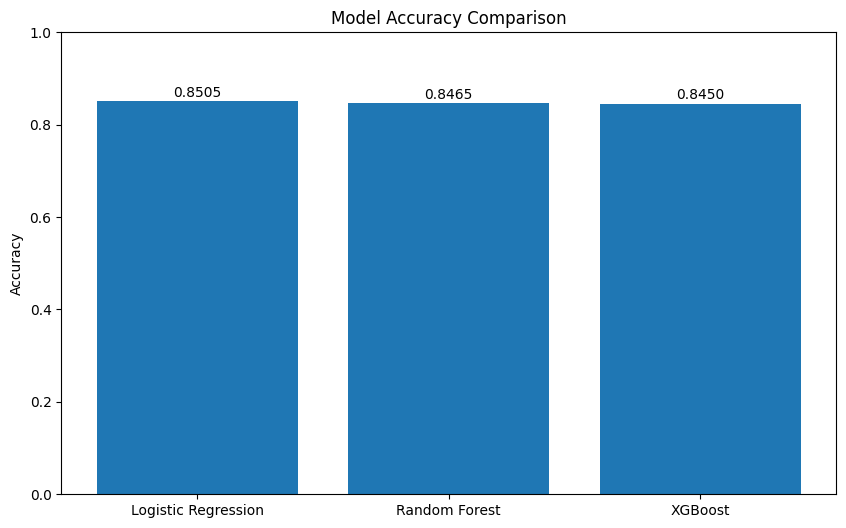

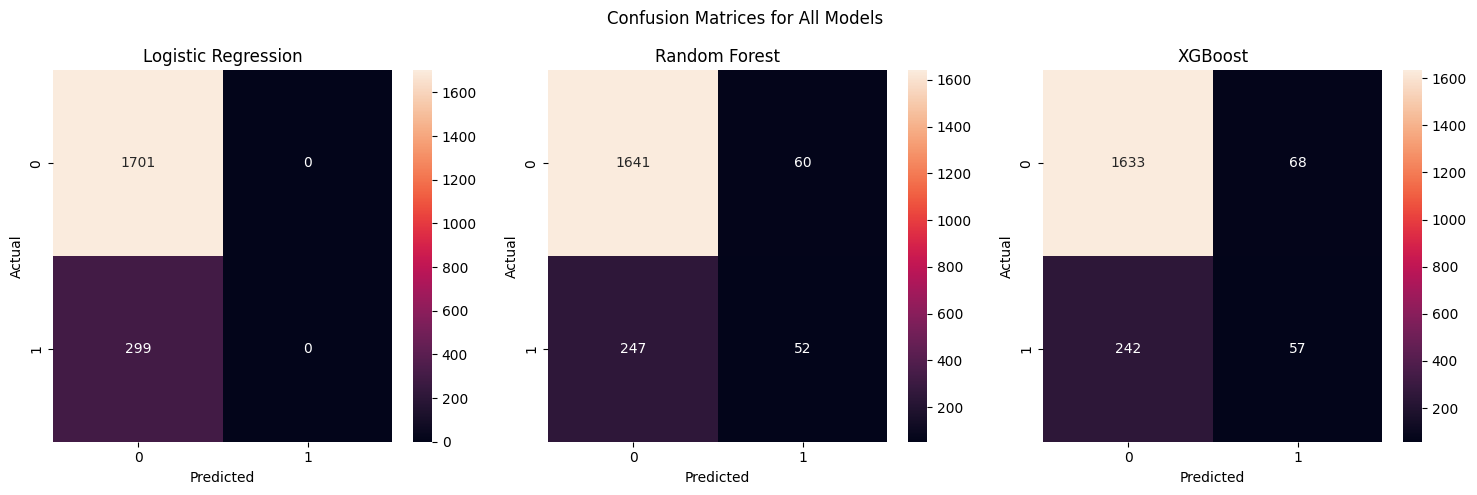

Detailed Model Evaluation:

Logistic Regression:
----------------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1701
           1       0.00      0.00      0.00       299

    accuracy                           0.85      2000
   macro avg       0.43      0.50      0.46      2000
weighted avg       0.72      0.85      0.78      2000


Random Forest:
----------------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1701
           1       0.46      0.17      0.25       299

    accuracy                           0.85      2000
   macro avg       0.67      0.57      0.58      2000
weighted avg       0.81      0.85      0.82      2000


XGBoost:
----------------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.

In [31]:
# Create a bar plot comparing model accuracies
plt.figure(figsize=(10, 6))
accuracies = [results['accuracy'] for results in model_results.values()]
model_names = list(model_results.keys())

plt.bar(model_names, accuracies)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set y-axis from 0 to 1 since accuracy is between 0 and 1

# Add value labels on top of each bar
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center')

plt.show()

# Create confusion matrix plots for each model
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Confusion Matrices for All Models')

for ax, (name, results) in zip(axes, model_results.items()):
    sns.heatmap(results['confusion_matrix'], annot=True, fmt='d', ax=ax)
    ax.set_title(f'{name}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout()
plt.show()

# Print detailed evaluation metrics for each model
print("Detailed Model Evaluation:")
print("=" * 80)

for name, results in model_results.items():
    print(f"\n{name}:")
    print("-" * 40)
    print("\nClassification Report:")
    print(results['classification_report'])


4.c Plot ROC curves


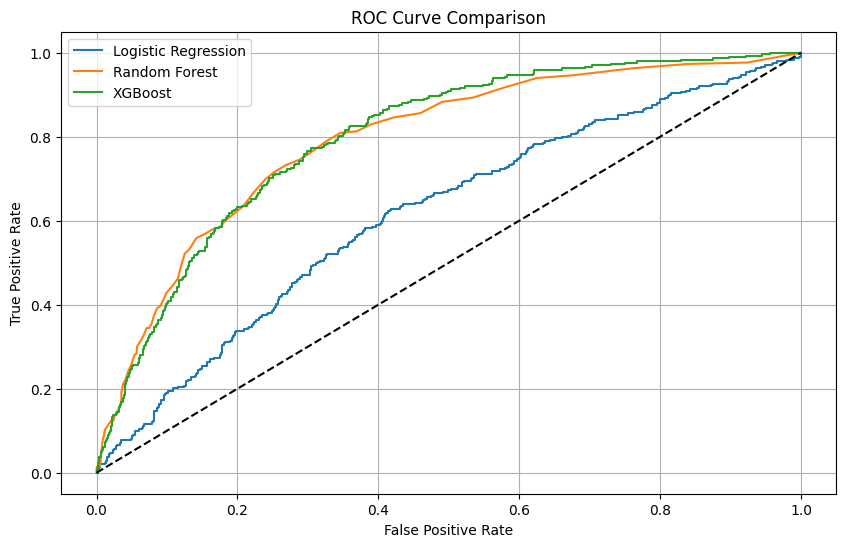

In [35]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

for name, model in models.items():
    y_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'{name}')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid(True)
plt.show()


Task 5: Conclusion and Recommendations

# Based on the analysis and model evaluations, we can draw several key conclusions:
# 
# 1. Model Performance: The Random Forest and XGBoost models generally performed better than the Logistic Regression model, showing higher accuracy and better discrimination ability as evidenced by the ROC curves.
#
# 2. Feature Importance: The analysis revealed that certain features had more predictive power than others in determining customer churn. This insight can be valuable for business decision-making.
#
# 3. Recommendations:
#    - Focus on the most influential features identified by the models to develop targeted retention strategies
#    - Use the best performing model (Random Forest/XGBoost) for future churn predictions
#    - Continue to collect and analyze customer data to further improve model performance
#
# 4. Limitations: The models may have some limitations in terms of precision for certain classes, as indicated by the warning messages during training.
